In [3]:
import pandas as pd
import numpy as np

# 날짜 범위 생성
date_rng = pd.date_range(start='2020-01-01', end='2021-01-01', freq='D')

# 예시 시계열 데이터 생성 (랜덤 값)
data = np.random.randn(len(date_rng))
ts_data = pd.DataFrame(data, index=date_rng, columns=['value'])

# 시계열 데이터 확인
print(ts_data.head())

               value
2020-01-01 -0.150911
2020-01-02  2.063262
2020-01-03  1.120312
2020-01-04 -1.072384
2020-01-05 -1.390722


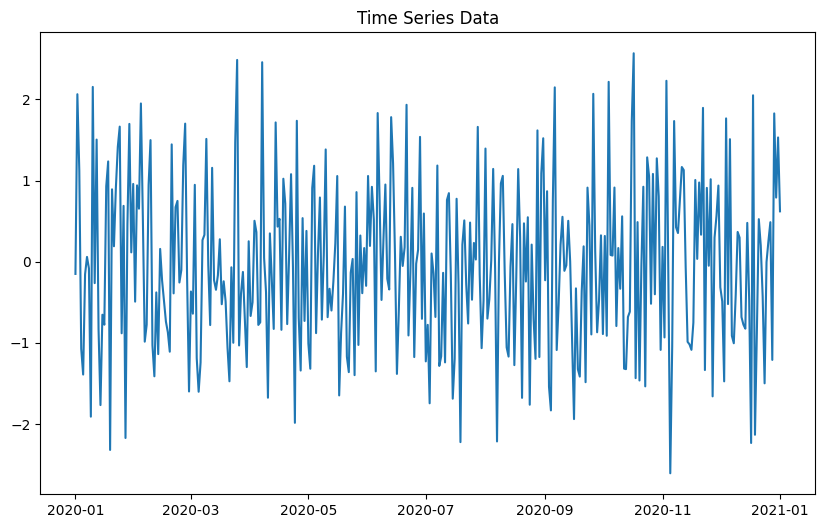

In [4]:
import matplotlib.pyplot as plt

# 시계열 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(ts_data.index, ts_data['value'])
plt.title('Time Series Data')
plt.show()

In [5]:
import statsmodels.api as sm

# ARIMA 모델 피팅
model = sm.tsa.ARIMA(ts_data, order=(5,1,0))  # AR=5, I=1, MA=0
model_fit = model.fit()

# 모델 요약
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  367
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -557.703
Date:                Sun, 02 Nov 2025   AIC                           1127.405
Time:                        04:53:03   BIC                           1150.821
Sample:                    01-01-2020   HQIC                          1136.710
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8960      0.054    -16.556      0.000      -1.002      -0.790
ar.L2         -0.8175      0.072    -11.338      0.000      -0.959      -0.676
ar.L3         -0.6302      0.079     -7.992      0.0

2021-01-02    0.585684
2021-01-03    0.772628
2021-01-04    1.096547
2021-01-05    0.904050
2021-01-06    0.866036
2021-01-07    0.785878
2021-01-08    0.850239
2021-01-09    0.901305
2021-01-10    0.901913
2021-01-11    0.857181
Freq: D, Name: predicted_mean, dtype: float64


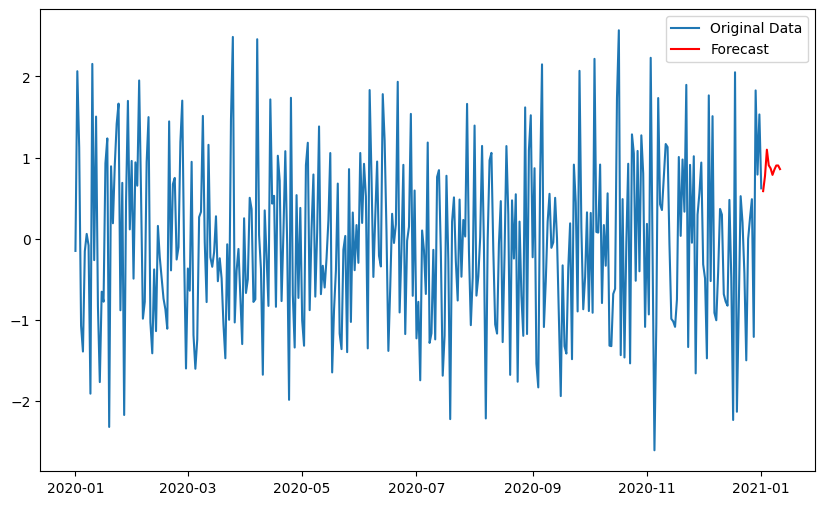

In [6]:
# 10일 후 예측
forecast = model_fit.forecast(steps=10)
print(forecast)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(ts_data.index, ts_data['value'], label='Original Data')
plt.plot(pd.date_range(start='2021-01-02', periods=10, freq='D'), forecast, label='Forecast', color='red')
plt.legend()
plt.show()

In [7]:
# SARIMA 모델 피팅
sarima_model = sm.tsa.SARIMAX(ts_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# 모델 요약
print(sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  367
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -539.612
Date:                            Sun, 02 Nov 2025   AIC                           1089.225
Time:                                    04:53:14   BIC                           1108.571
Sample:                                01-01-2020   HQIC                          1096.922
                                     - 01-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0680      0.056     -1.215      0.224      -0.178       0.042
ma.L1         -0.9998      0.921   

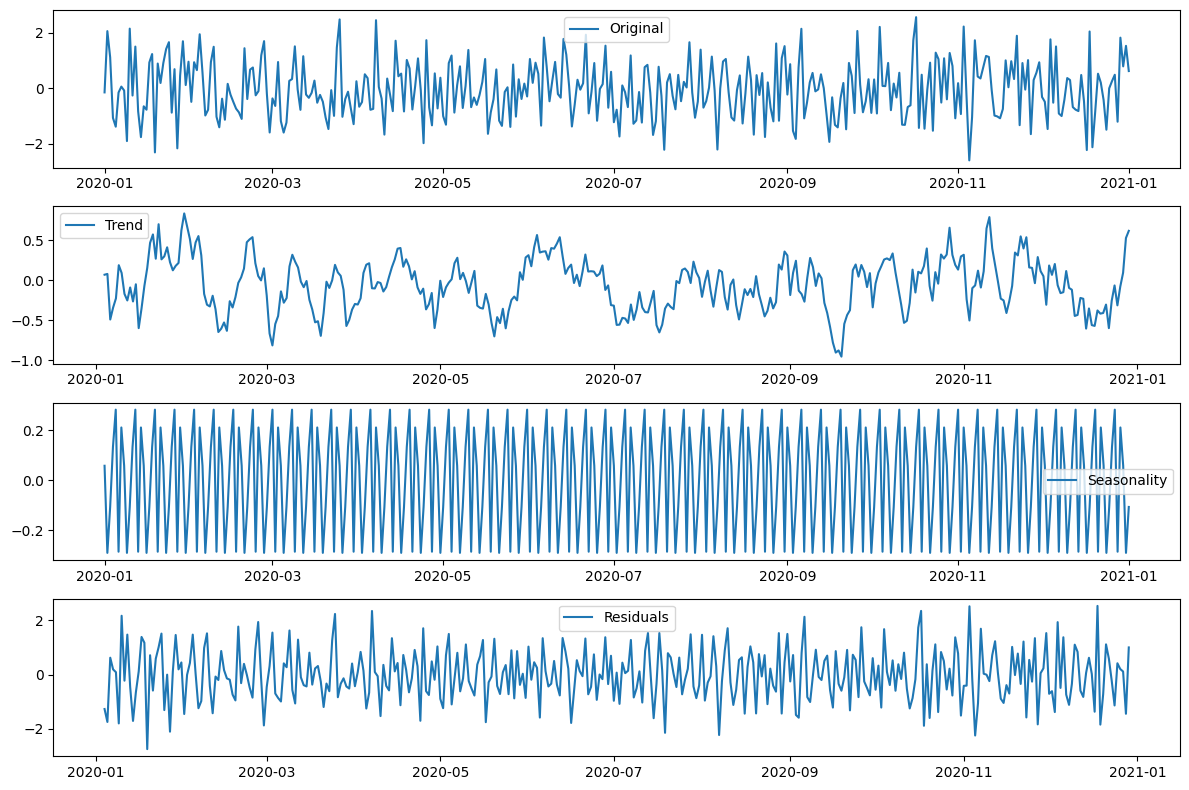

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 분해
decomposition = seasonal_decompose(ts_data, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 시각화
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(ts_data, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [9]:
import numpy as np

# 데이터
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# 윈도우 크기 설정 (3일 이동평균 예시)
window_size = 3

# 이동평균 계산
moving_average = np.convolve(data, np.ones(window_size)/window_size, mode='valid')

print(moving_average)

[2. 3. 4. 5. 6. 7. 8. 9.]


In [10]:
import pandas as pd

# 데이터 (시리즈 형태로 변환)
data = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# 윈도우 크기 설정 (3일 이동평균 예시)
window_size = 3

# 이동평균 계산
moving_average = data.rolling(window=window_size).mean()

print(moving_average)

0    NaN
1    NaN
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64


In [11]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# 예시 데이터
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# 3일 이동평균
print(moving_average(data, 3))

[2. 3. 4. 5. 6. 7. 8. 9.]


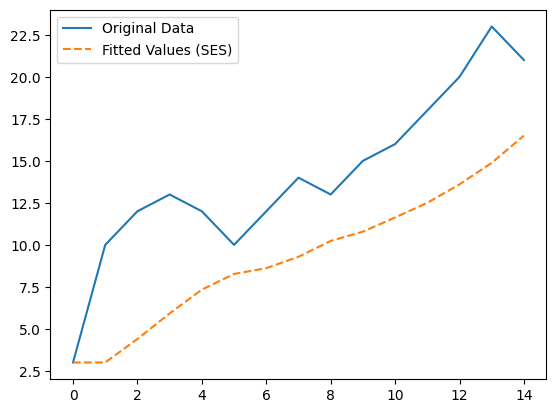

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# 데이터 생성 (예시)
data = [3, 10, 12, 13, 12, 10, 12, 14, 13, 15, 16, 18, 20, 23, 21]

# Pandas 시리즈로 변환
data_series = pd.Series(data)

# 지수평활법 모델 적용
model = SimpleExpSmoothing(data_series)
fit = model.fit(smoothing_level=0.2, optimized=False)

# 예측 결과
fitted_values = fit.fittedvalues

# 원본 데이터와 예측 결과 비교
plt.plot(data_series, label='Original Data')
plt.plot(fitted_values, label='Fitted Values (SES)', linestyle='--')
plt.legend()
plt.show()

/tmp/ipython-input-1627449024.py:5: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=0.8, smoothing_slope=0.2)
/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


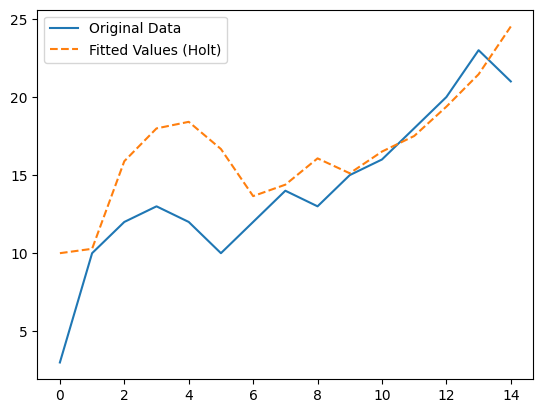

In [13]:
from statsmodels.tsa.holtwinters import Holt

# Holt 모델 적용
model = Holt(data_series)
fit = model.fit(smoothing_level=0.8, smoothing_slope=0.2)

# 예측 결과
fitted_values = fit.fittedvalues

# 원본 데이터와 예측 결과 비교
plt.plot(data_series, label='Original Data')
plt.plot(fitted_values, label='Fitted Values (Holt)', linestyle='--')
plt.legend()
plt.show()

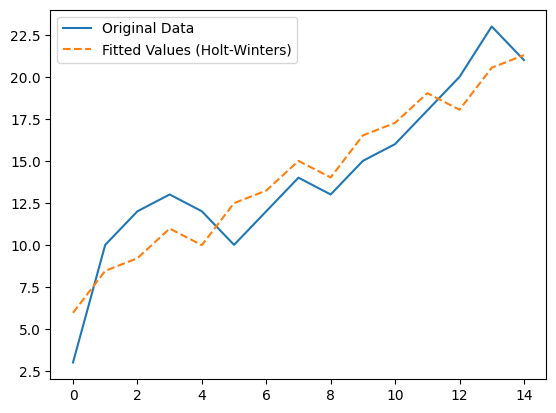

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Holt-Winters 모델 적용 (계절성을 주기적으로 반영)
model = ExponentialSmoothing(data_series, trend='add', seasonal='add', seasonal_periods=4)
fit = model.fit()

# 예측 결과
fitted_values = fit.fittedvalues

# 원본 데이터와 예측 결과 비교
plt.plot(data_series, label='Original Data')
plt.plot(fitted_values, label='Fitted Values (Holt-Winters)', linestyle='--')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


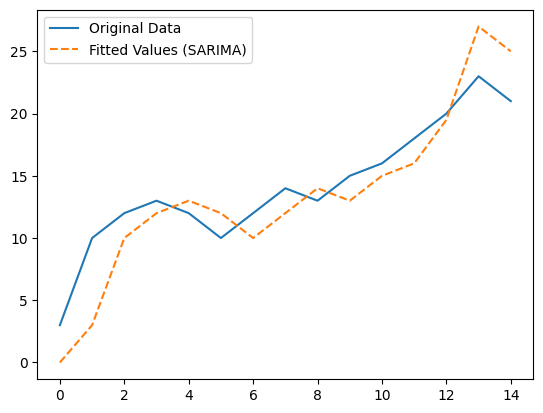

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA 모델 설정
model = SARIMAX(data_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# 모델 학습
fit = model.fit()

# 예측 값 생성
fitted_values = fit.fittedvalues

# 원본 데이터와 예측 결과 비교
plt.plot(data_series, label='Original Data')
plt.plot(fitted_values, label='Fitted Values (SARIMA)', linestyle='--')
plt.legend()
plt.show()

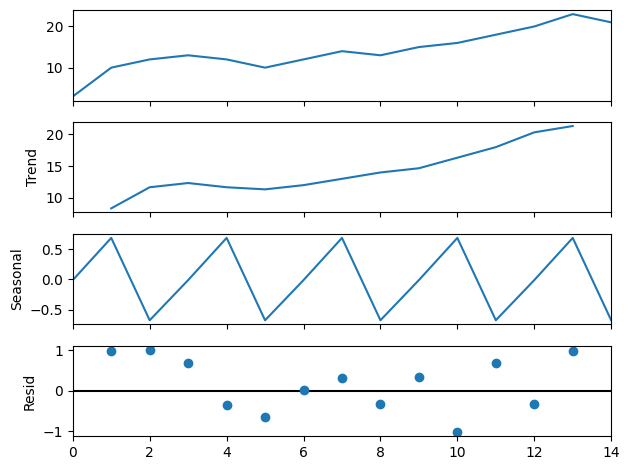

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 분해
# The seasonal_decompose function requires at least two full cycles of data when specifying a period.
# Since the data_series has only 15 observations, a period of 12 is too large (requires 24 observations).
# We will use a smaller period, for example, 3, which is compatible with the data length.
decomposition = seasonal_decompose(data_series, model='additive', period=3)

# 분해 결과 시각화
decomposition.plot()
plt.show()

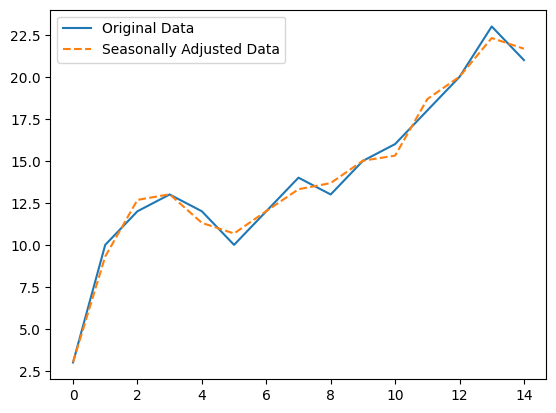

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 계절성 분해
# The seasonal_decompose function requires at least two full cycles of data when specifying a period.
# Since the data_series has only 15 observations, a period of 12 is too large (requires 24 observations).
# We will use a smaller period, for example, 3, which is compatible with the data length.
decomposition = seasonal_decompose(data_series, model='additive', period=3)

# 계절성 제거 (계절 조정)
seasonally_adjusted = data_series - decomposition.seasonal

# 원본 데이터와 계절 조정 데이터 비교
plt.plot(data_series, label='Original Data')
plt.plot(seasonally_adjusted, label='Seasonally Adjusted Data', linestyle='--')
plt.legend()
plt.show()